## Mudcard
- **The muddiest thing for me is that why we need a pd.dataframe. Why is it priority?**
    - Practicioners of the field use it so you should be familiar with it too.
- **When/would you ever turn strings or qualitative data from CSV files into numerical data?**
    - my advice is to leave the data untransformed during EDA
    - we will transform data to numerical values when we prepare it for ML
- **Why do we need double brackets for selecting columns in the dataframe but only single bracket for selecting rows?**
    - sometimes when you select rows or columns, you use a list of inidces or a list of column names
    - that's where the extra square bracket is coming from
- **Technically q3 asked to Merge the third data frame with df_append it should be right to join?**
    - df1.merge(df2,how='left') is the same as df2.merge(df1,how='right')
    - try it out
- **Is merge basically the same thing as join in pandas?**
    - similar, join takes two dataframes and combines them based on their indices
    - use the toy datasets from the previous lecture and try it out
- **what's the advantage of using pd.concat() over pd.merge()?**
    - concat is used to append dataframes
    - your goal determines which one is more appropriate/adventageous to use

## <center> Exploratory data analysis in python, part 2 </center>

# <center> Learning objectives </center>
### By the end of this lecture, you will be able to
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## Dataset of the day

Adult dataset, see [here](https://archive.ics.uci.edu/ml/datasets/Adult)

## Packages of the day

matplotlib and pandas

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - **visualize one column (categorical or continuous data)**
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


##  Let's load the data first!

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/adult_data.csv')
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Column is categorical

In [2]:
print(df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


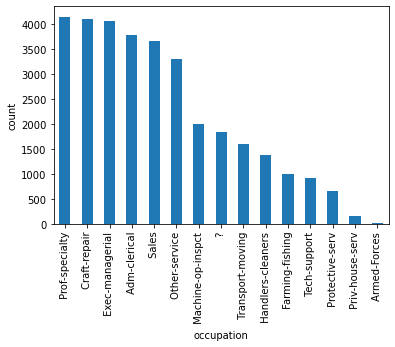

In [3]:
pd.value_counts(df['occupation']).plot.bar()
plt.ylabel('count')
plt.xlabel('occupation')
plt.show()

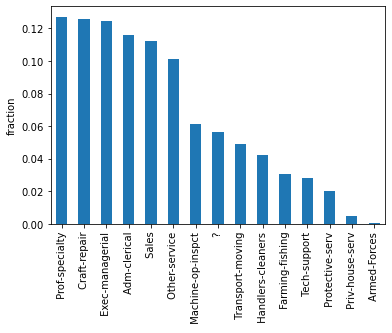

In [4]:
pd.value_counts(df['occupation'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.show()

## Be very careful if the categories are ordered (e.g., months)!
https://st12.ning.com/topology/rest/1.0/file/get/8259702852?profile=original

https://st12.ning.com/topology/rest/1.0/file/get/8259711099?profile=original

### Column is continuous

In [5]:
print(df['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


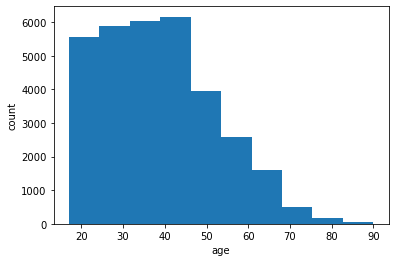

In [6]:
df['age'].plot.hist()   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

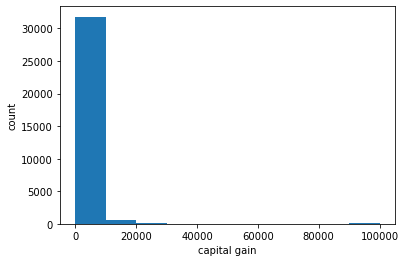

In [7]:
df['capital-gain'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogy()
#plt.semilogx()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

# Quiz 1
What fraction of the people in the dataset have a Masters degree?

In [8]:
# add your code here:



### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - **visualize column pairs (all variations of continuous and categorical columns)**
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


### Continuous vs. continuous columns
- scatter plot

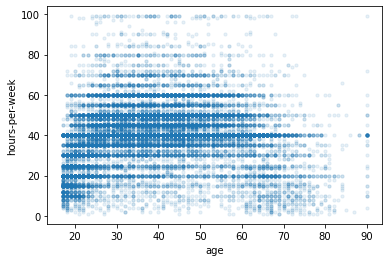

In [9]:
df.plot.scatter('age','hours-per-week',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

### Continuous vs. continuous columns
- heatmap

In [10]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['age'], df['hours-per-week'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

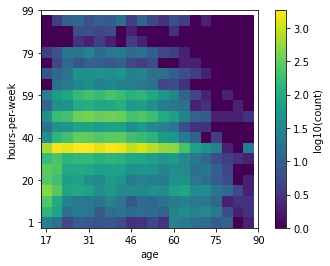

In [11]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

### Categorical vs. categorical columns
- stacked bar plot

In [12]:
count_matrix = df.groupby(['race', 'gross-income']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

gross-income            <=50K      >50K
race                                   
 Amer-Indian-Eskimo  0.884244  0.115756
 Asian-Pac-Islander  0.734360  0.265640
 Black               0.876120  0.123880
 Other               0.907749  0.092251
 White               0.744140  0.255860


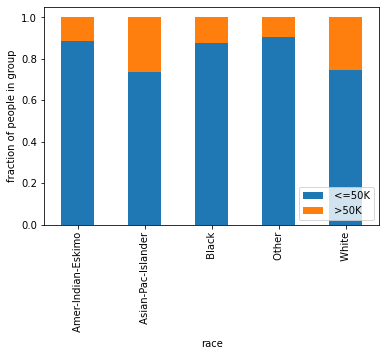

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Continuous vs. categorical columns
- category-specific histograms

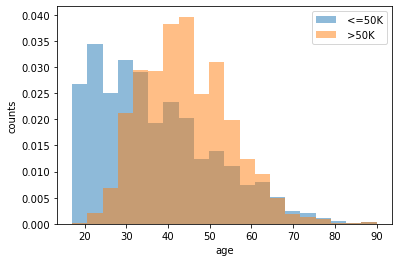

In [14]:
import matplotlib
from matplotlib import pylab as plt

categories = df['gross-income'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['gross-income']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('counts')
plt.xlabel('age')
plt.show()

### Continuous vs. categorical columns
- box plot

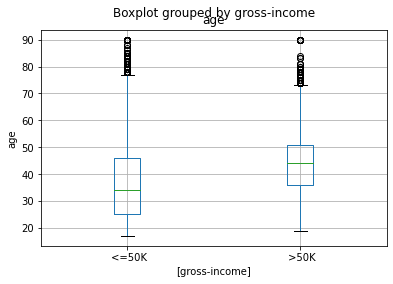

In [15]:
df[['age','gross-income']].boxplot(by='gross-income')
plt.ylabel('age')
plt.show()

### Continuous vs. categorical columns
- violin plot

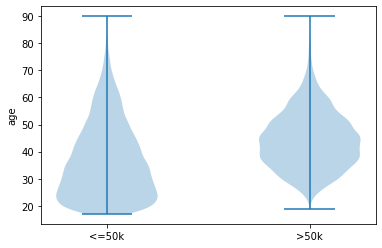

In [16]:
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

## Quiz 2
Pair the column name(s) with the appropriate visualization type!

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - **visualize multiple columns simultaneously**

#### Scatter matrix

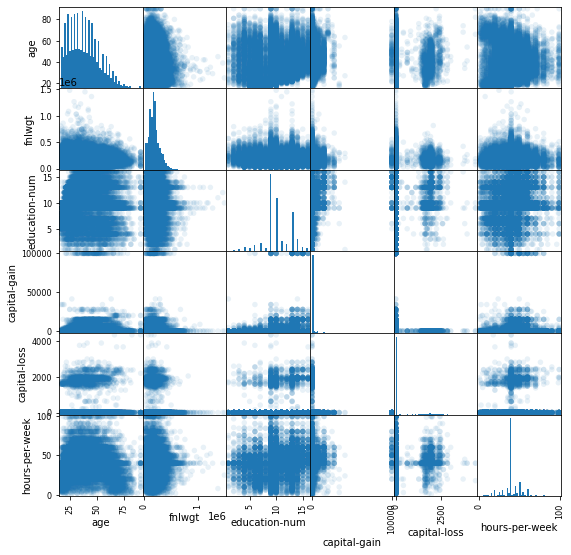

In [17]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

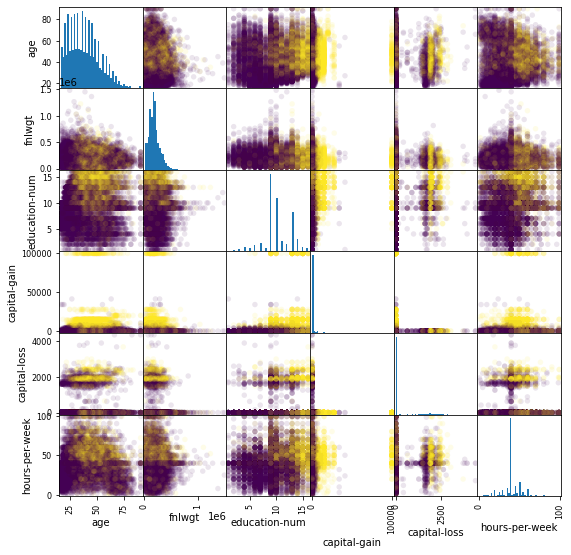

In [18]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['gross-income']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

### By now, you can
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## [Matplotlib cheatsheets!](https://github.com/matplotlib/cheatsheets)

The cheatsheets in this repo are excellent. Feel free to use them any time!

## Other great resources for visualization

https://www.data-to-viz.com/

https://pyviz.org/

# Mud card